[*********************100%***********************]  4 of 4 completed
----------------------------------------------------------------------
Stocks: BPAC11.SA, IVVB11.SA, JBSS3.SA, VALE3.SA
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.500
Portfolio Volatility: 0.171
Portfolio Sharpe Ratio: 2.896

Skewness:
   BPAC11.SA  IVVB11.SA  JBSS3.SA  VALE3.SA
0  -0.002248  -0.310295 -0.204718 -0.330736

Kurtosis:
   BPAC11.SA  IVVB11.SA  JBSS3.SA  VALE3.SA
0  -1.514813  -0.583113 -0.971777 -1.352295

Information:
   Allocation       Name
0        0.25  BPAC11.SA
1        0.25  IVVB11.SA
2        0.25   JBSS3.SA
3        0.25   VALE3.SA
----------------------------------------------------------------------
pf.risk_free_rate = 0.005
pf.freq = 252
----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.445
Annual Volatility: 0.149
Shar

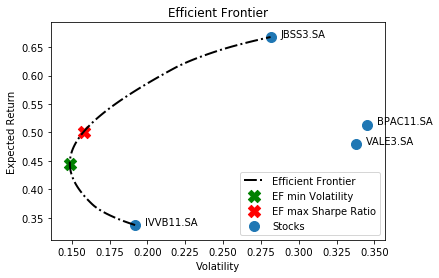

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 252 days
Expected return: 0.451
Volatility: 0.149
Sharpe Ratio: 2.994

Optimal weights:
            BPAC11.SA  IVVB11.SA  JBSS3.SA  VALE3.SA
Allocation   0.172511   0.535212  0.221382  0.070895
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 252 days
Expected return: 0.497
Volatility: 0.157
Sharpe Ratio: 3.140

Optimal weights:
            BPAC11.SA  IVVB11.SA  JBSS3.SA  VALE3.SA
Allocation   0.194955   0.379381  0.346745   0.07892
----------------------------------------------------------------------


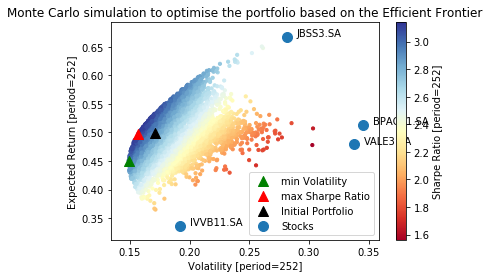

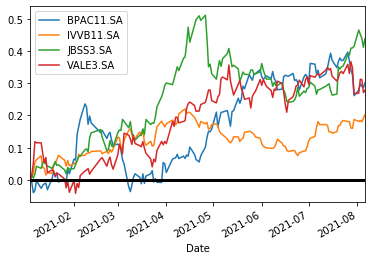

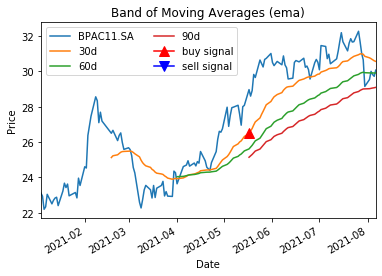

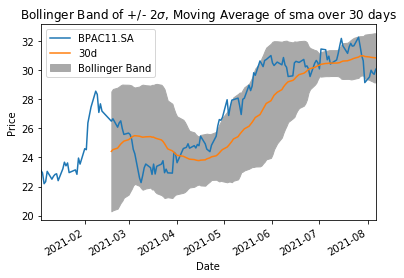

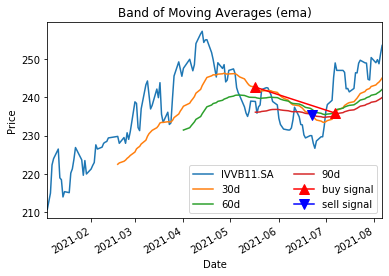

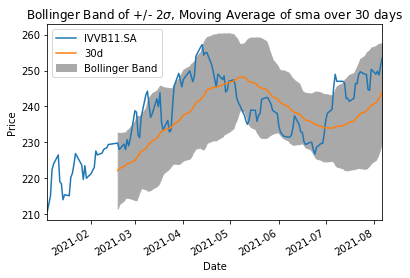

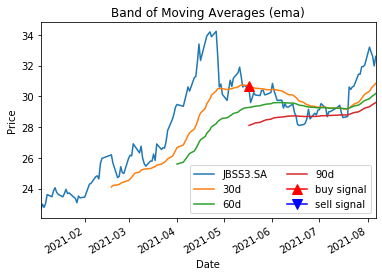

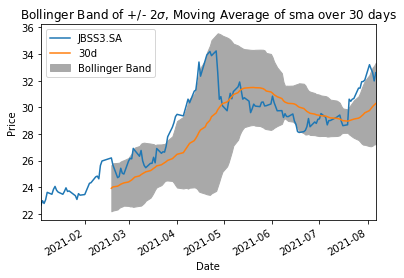

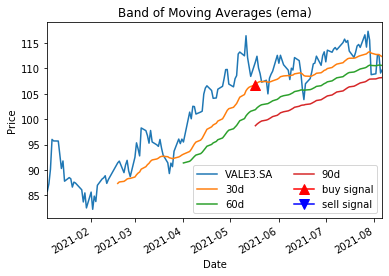

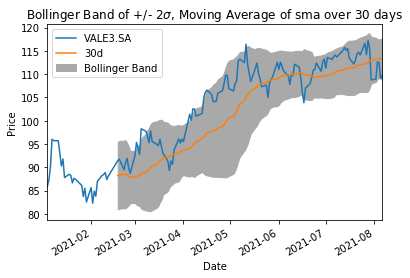

In [5]:
from finquant.portfolio import build_portfolio
from finquant.moving_average import compute_ma
from finquant.moving_average import sma
from finquant.moving_average import plot_bollinger_band
from finquant.moving_average import ema
import matplotlib.pyplot as plt
names = ['BPAC11.SA', 'IVVB11.SA', 'JBSS3.SA', 'VALE3.SA']
start_date = '2021-01-01'
end_date = '2021-08-09'
pf = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date,
                    data_api="yfinance")
pf.properties()
print("pf.risk_free_rate = {}".format(pf.risk_free_rate))
print("pf.freq = {}".format(pf.freq))
pf.ef_minimum_volatility(verbose=True)
pf.ef_maximum_sharpe_ratio(verbose=True)

pf.ef_plot_efrontier()
pf.ef_plot_optimal_portfolios()
pf.plot_stocks()
plt.show()

opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
pf.mc_properties()
pf.mc_plot_results()
# again, the individual stocks can be added to the plot
pf.plot_stocks()
plt.show()

pf.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)

for name in names:
    dis = pf.get_stock(name).data.copy(deep=True)
    spans = [30,60, 90]
    span = 30
    dis_ma = compute_ma(dis, ema, spans)
    plot_bollinger_band(dis, sma, span)

In [22]:
from finquant.portfolio import build_portfolio
names = ['BPAC11.SA', 'IVVB11.SA', 'JBSS3.SA', 'VALE3.SA']
start_date = '2021-01-01'
end_date = '2021-08-09'
pf = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date,
                    data_api="yfinance")
pf.stocks

[*********************100%***********************]  4 of 4 completed


{'BPAC11.SA': <finquant.portfolio.Stock at 0x7fa9980d9c70>,
 'IVVB11.SA': <finquant.portfolio.Stock at 0x7fa9980d95e0>,
 'JBSS3.SA': <finquant.portfolio.Stock at 0x7fa9980d9880>,
 'VALE3.SA': <finquant.portfolio.Stock at 0x7fa985719610>}